# Análise Preditiva SINASC 2019 - Modelo para previsão do peso de recém-nascidos

## Importando as Bibliotecas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing / manipulation

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
workdir_path = '/content/drive/MyDrive/datasets'
os.chdir(workdir_path)
!ls

AP_cap.png  AP_drop.png  boxplot_origin.png  sinascrj19.csv


## Análise Exploratória

Os códigos abaixo foram utilizados para a apresentação de características do conjunto de dados utilizado no estudo. Possibilitando a visualização da dimensionalidade, o número de casos, o conjunto de variáveis, sua denominação, tipo e estados de atributos, dentre outras características.

+ Parte estatistica

In [4]:
sinasc19 = pd.read_csv('sinascrj19.csv')
print(sinasc19.shape)
sinasc19.head(10).T

(207989, 61)


,0,1,2,3,4,5,6,7,8,9
ORIGEM,1,1,1,1,1,1,1,1,1,1
CODESTAB,2.36515e+06,2.72706e+06,2.56134e+06,2.47358e+06,2.65403e+06,2.70753e+06,2.33681e+06,2.75771e+06,2.70304e+06,2.34488e+06
CODMUNNASC,220390,221100,230500,240710,240810,250750,250970,251140,260280,260960
LOCNASC,1,1,1,1,1,1,1,1,1,1
IDADEMAE,26,29,27,18,30,25,32,20,32,26
...,...,...,...,...,...,...,...,...,...,...
CODPAISRES,1,1,1,1,1,1,1,1,1,1
TPROBSON,3,10,7,2,2,2,3,3,10,5
PARIDADE,1,0,1,0,0,0,1,1,1,1
KOTELCHUCK,5,5,5,5,5,5,3,5,2,2


In [5]:
print(sinasc19.columns)
print('-----------------------------------------------------------------------------')
print(sinasc19.dtypes)
print('-----------------------------------------------------------------------------')
print(sinasc19.dtypes.value_counts())
print('-----------------------------------------------------------------------------')
print(sinasc19.info())

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR'],
      dtype='object')
-----------------------------------------------------------------------------
ORIGEM          int64
CODESTAB      fl

In [6]:
sinasc19.describe()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NUMEROLOTE,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR
count,207989.0,2.067690e+05,207989.000000,207989.000000,207989.000000,207065.000000,207336.00000,180992.000000,205826.000000,204300.000000,207989.000000,205678.000000,207871.000000,207867.000000,207989.000000,2.079890e+05,207857.000000,207989.000000,206220.000000,206351.000000,204576.000000,207984.000000,207671.000000,2.079890e+05,2.079890e+05,2.079890e+05,207989.000000,0.0,207027.000000,207027.000000,207027.000000,207333.000000,116188.000000,2.077450e+05,204574.000000,206723.000000,205326.000000,204995.000000,98282.000000,6.366000e+04,205678.000000,205678.000000,205835.000000,206321.000000,207543.000000,207481.000000,206351.000000,207809.000000,200081.000000,207987.000000,2.066200e+05,207333.000000,207989.0,207989.0,207989.0,207989.000000,207989.000000,207989.000000,2.079890e+05
mean,1.0,4.027585e+06,330346.123593,1.015861,27.317671,1.527786,4.10427,777573.788935,0.956944,0.248551,330357.675507,4.882462,1.024034,1.578197,3.716870,1.574990e+07,1326.550273,1.489646,8.877442,9.483521,2.710342,3169.207516,2.140776,1.581556e+07,2.019135e+07,1.610467e+07,60.201482,NaN,832.363001,324041.319712,32.363001,3.180102,3.907908,1.577952e+07,2.710344,1.185204,0.598015,0.396956,32.011681,1.551430e+07,38.415747,3.943193,9.430928,8.852245,1.148162,2.120469,2.427732,1.091858,2.868518,3.258704,1.580242e+07,6.928058,0.0,1.0,1.0,4.104558,0.614085,4.553274,1.469995e+06
std,0.0,2.200514e+06,1651.658504,0.200973,6.852959,0.952354,0.89891,305652.823665,1.279743,0.764043,157.323605,0.438519,0.171079,0.500621,0.887018,8.751966e+06,614.432099,0.500355,6.976617,5.423540,1.391103,574.538164,1.009936,8.594583e+06,3.341734e+03,8.265186e+06,92.914739,NaN,2.927034,29277.419457,2.927034,1.244938,2.299303,8.764944e+06,1.391101,1.488054,1.280457,0.905240,7.973018,8.638337e+06,2.167573,3.402715,10.542201,24.071156,0.959431,1.402609,1.637811,0.406659,1.544800,1.047351,8.758185e+06,2.972985,0.0,0.0,0.0,2.746622,0.486812,1.703556,7.168731e+05
min,1.0,2.000000e+01,110020.000000,1.000000,10.000000,1.000000,1.00000,10205.000000,0.000000,0.000000,330000.000000,1.000000,1.000000,1.000000,1.000000,1.012019e+06,0.000000,0.000000,0.000000,0.000000,1.000000,100.000000,1.000000,1.022019e+06,2.019000e+07,1.022019e+06,1.000000,NaN,811.000000,110000.000000,11.000000,0.000000,1.000000,1.011974e+06,1.000000,0.000000,0.000000,0.000000,9.000000,1.012019e+06,19.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.012019e+06,0.000000,0.0,1.0,1.0,1.000000,0.000000,1.000000,2.151130e+05
25%,1.0,2.280248e+06,330285.000000,1.000000,22.000000,1.000000,4.00000,512105.000000,0.000000,0.000000,330240.000000,5.000000,1.000000,1.000000,3.000000,8.082019e+06,918.000000,1.000000,8.000000,9.000000,1.000000,2885.000000,2.000000,9.012020e+06,2.019004e+07,9.052019e+06,16.000000,NaN,833.000000,330040.000000,33.000000,2.000000,2.000000,8.081995e+06,1.000000,0.000000,0.000000,0.000000,26.000000,8.052018e+06,38.000000,1.000000,6.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,8.082019e+06,5.000000,0.0,1.0,1.0,2.000000,0.000000,4.000000,7.870350e+05
50%,1.0,2.704390e+06,330455.000000,1.000000,27.000000,1.000000,4.00000,999992.000000,1.000000,0.000000,330455.000000,5.000000,1.000000,2.000000,4.000000,1.603202e+07,1341.000000,1.000000,9.000000,9.000000,4.000000,3205.000000,2.000000,1.510202e+07,2.019006e+07,1.608202e+07,27.000000,NaN,833.000000,330455.000000,33.000000,3.000000,3.000000,1

### Visualização dos Dados

A análise visual abrangeu aspectos diversos da distribuição dos dados pelas variáveis. Ao se reservar atenção à variável de desfecho, PESO, pode ser observado que essa é uma pouca das variáveis que performam uma escala ou outras tendências. Em destaque, na análise dos histogramas, pode ser observado que a variável Peso possui uma das melhores distribuições entre as classes, sendo uma métrica interessante para ser estudada.

- Numeros e relações com a variável peso
- Peso sozinho
- Peso e Sexo
- Peso e gestacao
- peso e semagestacao
- peso e trobson

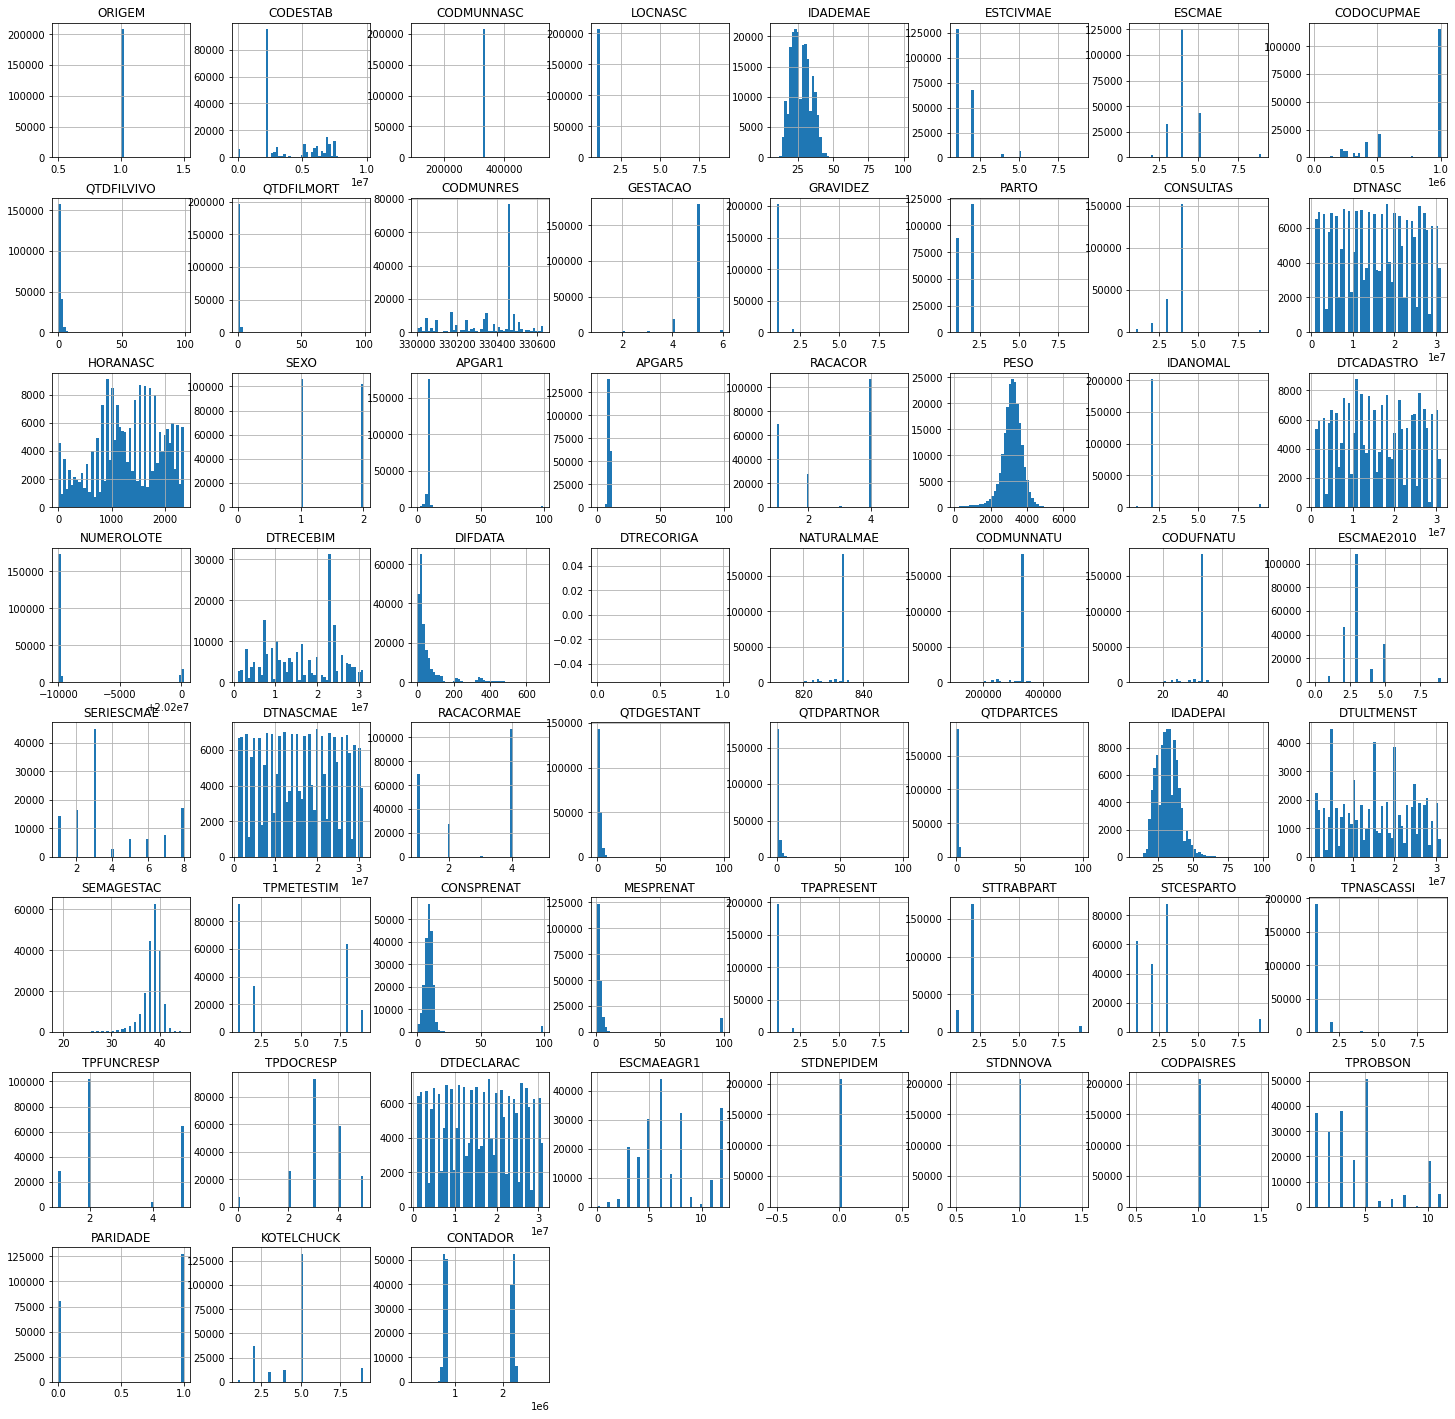

In [7]:
# Multi-plot grids
sinasc19.hist(bins=50, figsize=(25,25))
plt.show()

In [8]:
# Exclusão de variáveis sem nulas ou sem relação com o objeto
sinasc19 = sinasc19.drop(columns=['ORIGEM', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPNASCASSI',
                                  'DTCADASTRO', 'CODMUNNASC'], axis=1)

5.0    180014
4.0     19192
6.0      3081
3.0      2182
2.0      1136
1.0        73
Name: GESTACAO, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


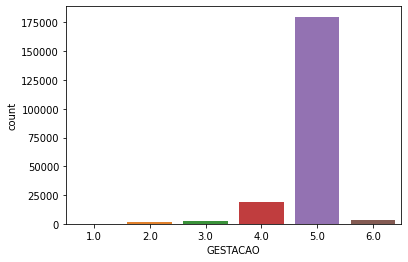

In [9]:
# GESTACAO

print(sinasc19['GESTACAO'].value_counts())
sns.countplot(sinasc19['GESTACAO'])

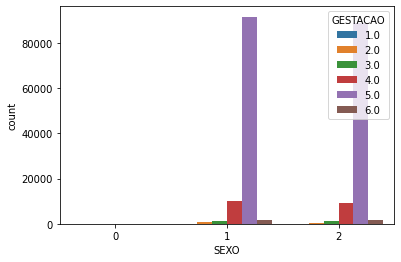

In [10]:
sns.countplot(x='SEXO', hue='GESTACAO', data=sinasc19)

39.0    62779
38.0    44552
40.0    39619
37.0    19215
41.0    13849
36.0     8570
35.0     4742
34.0     2888
42.0     2041
33.0     1711
32.0     1281
31.0      760
30.0      619
43.0      577
29.0      419
28.0      384
44.0      320
27.0      304
26.0      273
25.0      212
24.0      169
45.0      143
23.0      110
22.0       68
21.0       34
20.0       32
19.0        7
Name: SEMAGESTAC, dtype: int64


(-1.1132905143732454,
 1.1052553137488712,
 -1.1230214732493757,
 1.1010962606344803)

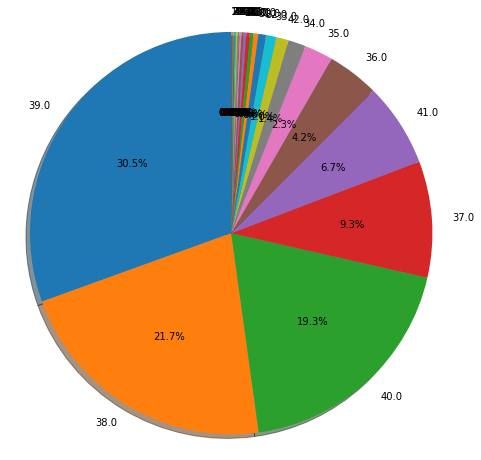

In [11]:
# SEMAGESTAC

print(sinasc19['SEMAGESTAC'].value_counts())

# Observação Gráfica
w = sinasc19['SEMAGESTAC'].value_counts().index
k = sinasc19['SEMAGESTAC'].value_counts().values

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(k, labels=w, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3169.2075159627666
            IDADEMAE           PESO
count  207989.000000  207984.000000
mean       27.317671    3169.207516
std         6.852959     574.538164
min        10.000000     100.000000
25%        22.000000    2885.000000
50%        27.000000    3205.000000
75%        32.000000    3520.000000
max        99.000000    7000.000000


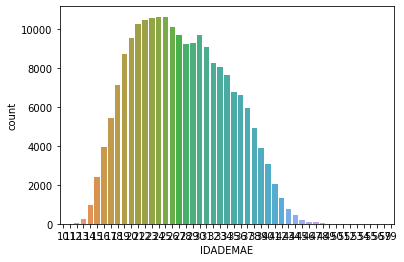

In [12]:
# IDADEMAE

sns.countplot(sinasc19['IDADEMAE'])
print(sinasc19.PESO.mean())
colunas = ['IDADEMAE','PESO']
print(sinasc19[colunas].describe())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


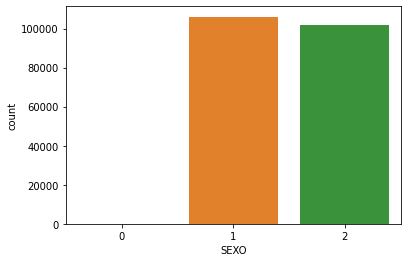

In [13]:
# SEXO

sns.countplot(sinasc19['SEXO'])

### Análise da Variável PESO

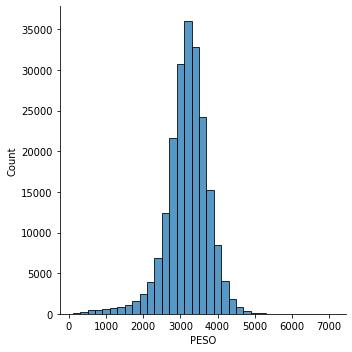

In [14]:
sns.displot(sinasc19, x='PESO', binwidth=200)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


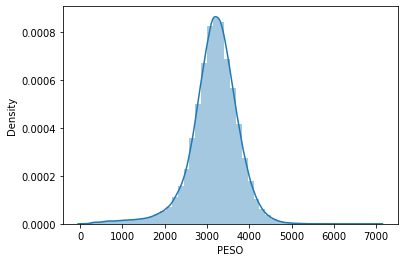

In [15]:
sns.distplot(sinasc19['PESO'].dropna())

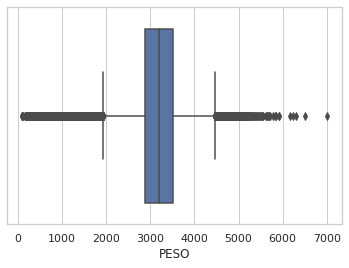

In [16]:
sns.set_theme(style='whitegrid')
bx = sns.boxplot(x=sinasc19['PESO'])

#### Relação PESO x Feautures

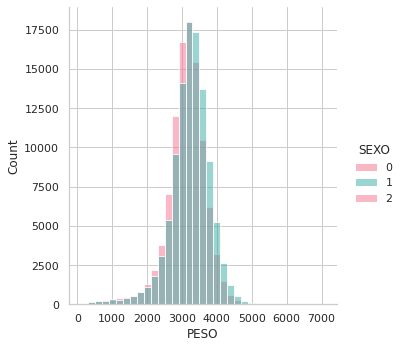

In [17]:
# Relação PESO x SEXO
sns.displot(sinasc19, x='PESO', binwidth=200, hue='SEXO', palette='husl')

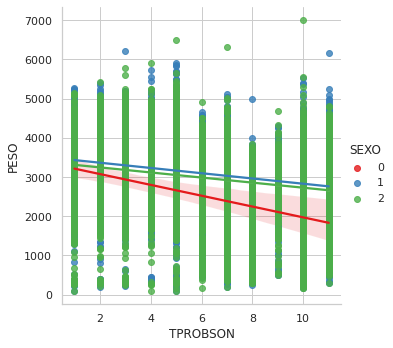

In [18]:
sns.lmplot(data=sinasc19, x='TPROBSON', y='PESO', hue='SEXO', palette='Set1')

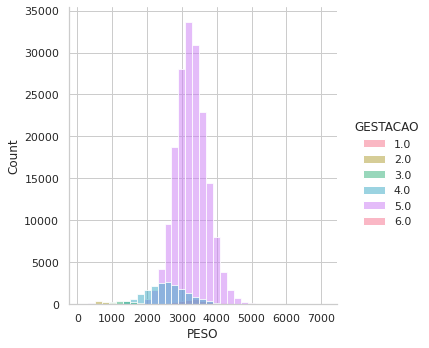

In [19]:
# Relação PESO x GESTACAO
sns.displot(sinasc19, x='PESO', binwidth=200, hue='GESTACAO', palette='husl')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


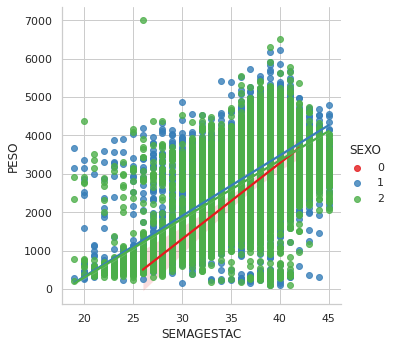

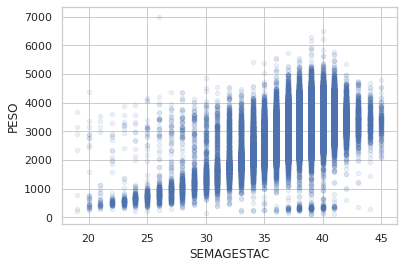

In [20]:
# Relação PESO x SEMAGESTAC
sns.lmplot(data=sinasc19, x='SEMAGESTAC', y='PESO', hue='SEXO', palette='Set1')
sinasc19.plot(kind='scatter', x='SEMAGESTAC', y='PESO', alpha=.1)

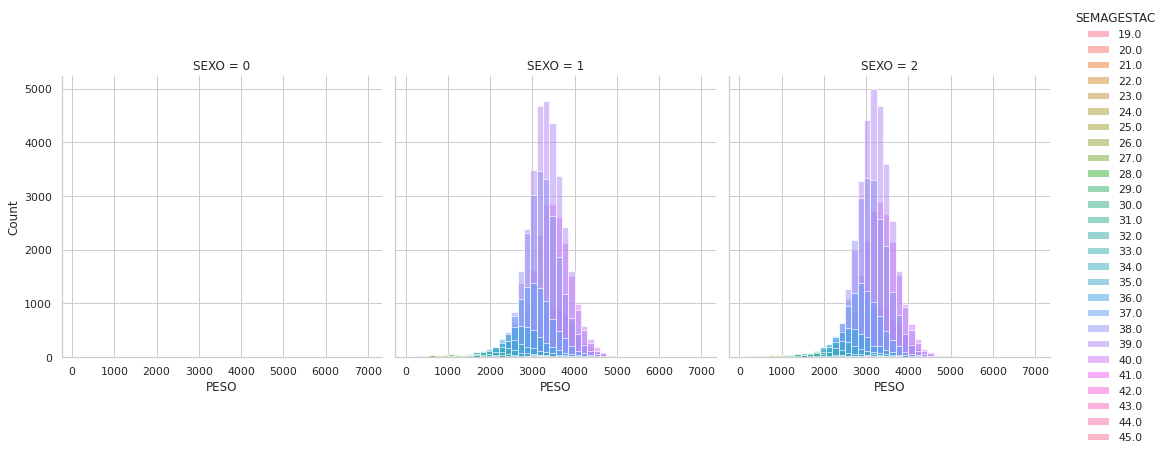

In [21]:
# PESO x SEMAGESTAC X SEXO
sns.displot(sinasc19, x='PESO', hue='SEMAGESTAC', binwidth=150, col='SEXO', palette='husl')

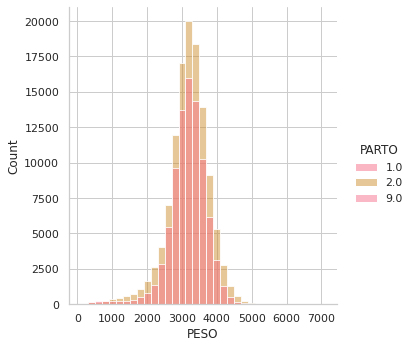

In [22]:
# PESO X PARTO
sns.displot(sinasc19, x='PESO', binwidth=200, hue='PARTO', palette='husl')

Com essas avaliações, buscou-se observar a distribuição dos dados e sua relação com valores extremos ou outliers. Nota-se que no conjunto de dados há valores destoantes, que podem ser derivados de fatores como mal preenchimento ou erro nas unidades de medida. Foram observados cerca de 220 mil casos, sendo que o peso médio dos recém-nascidos é de cerca de 3 kg,com valores extremos abaixo de 2 kg e acima de 4,5 kg, aproximadamente, com crianças do sexo masculino apresentando a tendência de terem maior peso que crianças do sexo feminino. As mães possuem média de idade de cerca de 27 anos, com idade mínima de 10 anos e máxima de 99 anos (com grande possibilidade de correspondem a um erro no conjunto de dados). Ademais, há ampla sobreposição para os valores de peso entre os tipos de parto, sendo que há bem menos casos em que o tipo de parto foi ignorado. Parece também não haver uma correlação direta entre a idade das mães e o peso das crianças, tal qual para o número de consultas e o peso, todavia, essa variável de desfecho indica tendências quando o número de semanas de gestação é considerado.

### Análise de Correlação

Correlação das features numéricas com o resultado em ordem crescente
PESO          1.000000
SEMAGESTAC    0.557292
GESTACAO      0.491645
TPROBSON      0.306223
GRAVIDEZ      0.220139
SEXO          0.102392
CONSULTAS     0.093714
PARIDADE      0.081233
QTDFILVIVO    0.048973
KOTELCHUCK    0.042783
QTDPARTCES    0.039668
TPAPRESENT    0.038960
QTDGESTANT    0.034521
MESPRENAT     0.033756
LOCNASC       0.029738
CODMUNNATU    0.025987
NATURALMAE    0.025974
CODUFNATU     0.025974
SERIESCMAE    0.024737
CONSPRENAT    0.022569
IDADEMAE      0.021956
QTDFILMORT    0.019944
QTDPARTNOR    0.017314
STTRABPART    0.016541
TPDOCRESP     0.015421
CODESTAB      0.011005
TPMETESTIM    0.010361
PARTO         0.010081
IDANOMAL      0.009568
CONTADOR      0.009247
IDADEPAI      0.008633
CODMUNRES     0.008401
RACACORMAE    0.008341
RACACOR       0.008340
ESCMAE        0.007794
ESTCIVMAE     0.007324
DTDECLARAC    0.004126
CODOCUPMAE    0.003993
TPFUNCRESP    0.003858
HORANASC      0.003795
NUMEROLOTE 

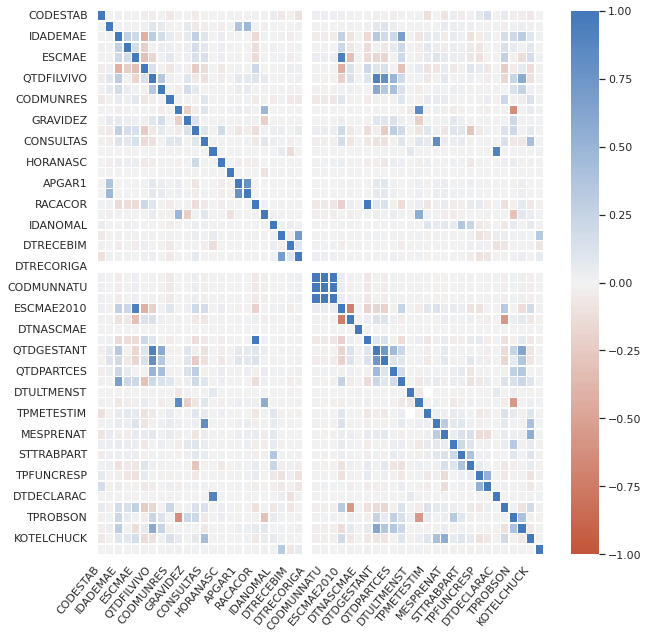

In [23]:
sinasc19['PESO'] = sinasc19['PESO'].astype('category').cat.codes

sinasc_corr = sinasc19.corr()
corr_values = sinasc_corr['PESO'].sort_values(ascending=False)
corr_values = abs(corr_values).sort_values(ascending=False)

print('Correlação das features numéricas com o resultado em ordem crescente')
print(abs(corr_values).sort_values(ascending=False))

corr4 = sinasc19.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr4,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 250, n=200),
    square=False,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

A partir disso, foram excluídas as variáveis com valores de baixa correlação, a exemplo de código de malformação congênita, série escolar da mãe, idade do pai, data da última menstruação,código do país de residência, trabalho de parto induzido ou não induzido, possibilidade de nascimento assistido, número de filhos mortos, escolaridade da mãe, cesáreo anterior ao trabalho de parto, dentre outras:

In [24]:
sinasc19 = sinasc19.drop(columns=['IDANOMAL', 'CONTADOR', 'CODMUNRES','RACACORMAE', 'RACACOR',
                                  'ESCMAE', 'ESTCIVMAE', 'DTDECLARAC', 'HORANASC',
                                  'NUMEROLOTE', 'ESCMAE2010', 'DTNASC','APGAR1', 'ESCMAEAGR1',
                                  'CODOCUPMAE', 'DIFDATA', 'STCESPARTO', 'TPFUNCRESP',
                                  'DTNASCMAE', 'DTRECEBIM', 'APGAR5' ], axis=1)

'''
sinasc19 = sinasc19.drop(columns=['QTDPARTNOR', 'QTDFILMORT', 'STTRABPART',
                                  'TPDOCRESP', 'CODESTAB', 'TPMETESTIM', 'PARTO'], axis=1)

sinasc19 = sinasc19.drop(columns=['KOTELCHUCK', 'QTDPARTCES', 'TPAPRESENT', 'QTDGESTANT',
                                  'MESPRENAT', 'LOCNASC', 'CODMUNNATU','CODUFNATU',
                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)

sinasc19 = sinasc19.drop(columns=['LOCNASC', 'CODMUNNATU','CODUFNATU',
                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)

'''

"\nsinasc19 = sinasc19.drop(columns=['QTDPARTNOR', 'QTDFILMORT', 'STTRABPART',\n                                  'TPDOCRESP', 'CODESTAB', 'TPMETESTIM', 'PARTO'], axis=1)\n\nsinasc19 = sinasc19.drop(columns=['KOTELCHUCK', 'QTDPARTCES', 'TPAPRESENT', 'QTDGESTANT',\n                                  'MESPRENAT', 'LOCNASC', 'CODMUNNATU','CODUFNATU',\n                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)\n\nsinasc19 = sinasc19.drop(columns=['LOCNASC', 'CODMUNNATU','CODUFNATU',\n                                  'NATURALMAE','CONSPRENAT', 'IDADEMAE'], axis=1)\n\n"

## Pré-Processamento

### Tratamento de outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


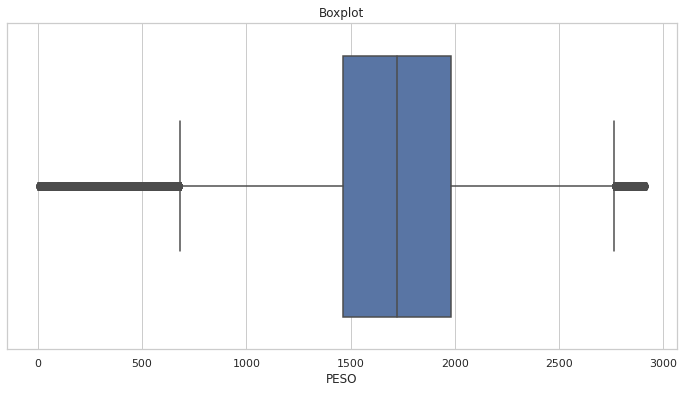

In [25]:
fig2, ax2 = plt.subplots(figsize=(12,6))
fig2 = sns.boxplot(sinasc19.PESO).set_title('Boxplot')
fig2.figure.savefig('boxplot_origin.png')

In [26]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(sinasc19.PESO)

,sub,values
0,IQR,520.00000
1,Upper Bound,2764.00000
2,Lower Bound,684.00000
3,Sum outliers,5223.00000
4,percentage outliers,2.51119


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


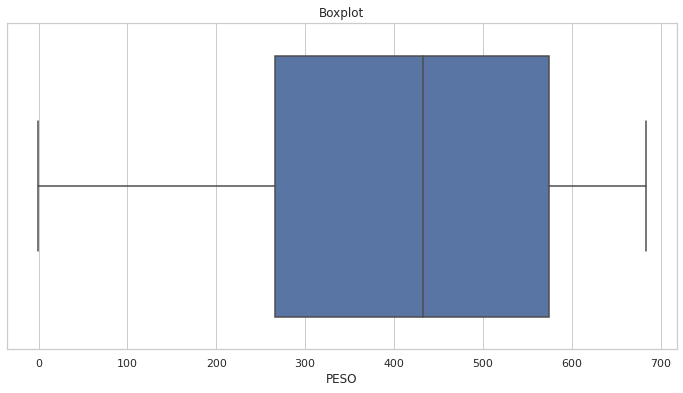

In [27]:
s = sinasc19['PESO']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

#drop outliers
sinasc19 = sinasc19[(sinasc19['PESO'] <= upper_bound)]
sinasc19 = sinasc19[(sinasc19['PESO'] <= lower_bound)]

'''# limiting outliers
sinasc19['PESO'] = np.where(sinasc19['PESO'] > upper_bound, upper_bound,sinasc19['PESO']) #higher
sinasc19['PESO'] = np.where(sinasc19['PESO'] < lower_bound, lower_bound,sinasc19['PESO']) #lower'''


fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(sinasc19.PESO).set_title('Boxplot')
fig.figure.savefig('AP_drop.png')

### Tratamento de Missing Values

O algoritmo acima contém elementos que facilitam na análise de valores faltantes, sendo melhor do que funções e métodos separadamente. Em síntese ele retorna o total de missings de cada feature, bem como o percentual dentro de cada uma. O gráfico possibilita visualizar melhor o percentual de missing values de cada features, a atribuição feita no código é uma linha de “corte” de 50%, contudo visando reservar os atributos que podem conter uma boa correção com o “PESO”, foi aplicado no modelo a seguir um corte de 45%, isto é, exclusão das features que estão sobre este percentual. Ademais, foi programada a substituição dos atributos numéricos pela mediana, medida central que expressa melhor assertividade do que a média, por exemplo, principalmente em casos com maior possibilidade de variação numérica. Dentre os atributos categóricos foi substituído pela moda dos valores existentes.

Isso facilita para interpretação do gráfico abaixo, que acrescente análise visual ao problema dos valores faltantes. Como um gráfico de barras simples o mesmo traça uma linha horizontal no ponto 50% da escala. Além disso o percentual anteriormente apresentado será a base para exclusão de das features com mais de 45% de valores faltantes. 

Sendo os demais valores das features permanecentes substituídos pela média das variáveis numéricas e pela mediana com variáveis categóricas.


CODESTAB        63
LOCNASC          0
IDADEMAE         0
QTDFILVIVO      26
QTDFILMORT      42
GESTACAO        60
GRAVIDEZ         3
PARTO            3
CONSULTAS        0
SEXO             0
PESO             0
CODANOMAL     4680
VERSAOSIST       0
DTRECORIGA    4790
NATURALMAE      38
CODMUNNATU      38
CODUFNATU       38
SERIESCMAE    2129
QTDGESTANT      14
QTDPARTNOR      37
QTDPARTCES      40
IDADEPAI      2674
DTULTMENST    3503
SEMAGESTAC      60
TPMETESTIM      60
CONSPRENAT      94
MESPRENAT       97
TPAPRESENT      14
STTRABPART      20
TPDOCRESP        0
TPROBSON         0
PARIDADE         0
KOTELCHUCK       0
dtype: int64
DTRECORIGA    100.000000
CODANOMAL      97.703549
DTULTMENST     73.131524
IDADEPAI       55.824635
SERIESCMAE     44.446764
MESPRENAT       2.025052
CONSPRENAT      1.962422
CODESTAB        1.315240
SEMAGESTAC      1.252610
TPMETESTIM      1.252610
GESTACAO        1.252610
QTDFILMORT      0.876827
QTDPARTCES      0.835073
CODUFNATU       0.793319
CODMUNNATU

([<matplotlib.axis.XTick at 0x7f40b3515d50>,
 [Text(0, 0, 'CODESTAB'),
  Text(0, 0, 'LOCNASC'),
  Text(0, 0, 'IDADEMAE'),
  Text(0, 0, 'QTDFILVIVO'),
  Text(0, 0, 'QTDFILMORT'),
  Text(0, 0, 'GESTACAO'),
  Text(0, 0, 'GRAVIDEZ'),
  Text(0, 0, 'PARTO'),
  Text(0, 0, 'CONSULTAS'),
  Text(0, 0, 'SEXO'),
  Text(0, 0, 'PESO'),
  Text(0, 0, 'CODANOMAL'),
  Text(0, 0, 'VERSAOSIST'),
  Text(0, 0, 'DTRECORIGA'),
  Text(0, 0, 'NATURALMAE'),
  Text(0, 0, 'CODMUNNATU'),
  Text(0, 0, 'CODUFNATU'),
  Text(0, 0, 'SERIESCMAE'),
  Text(0, 0, 'QTDGESTANT'),
  Text(0, 0, 'QTDPARTNOR'),
  Text(0, 0, 'QTDPARTCES'),
  Text(0, 0, 'IDADEPAI'),
  Text(0, 0, 'DTULTMENST'),
  Text(0, 0, 'SEMAGESTAC'),
  Text(0, 0, 'TPMETESTIM'),
  Text(0, 0, 'CONSPRENAT'),
  Text(0, 0, 'MESPRENAT'),
  Text(0, 0, 'TPAPRESENT'),
  Text(0, 0, 'STTRABPART'),
  Text(0, 0, 'TPDOCRESP'),
  Text(0, 0, 'TPROBSON'),
  Text(0, 0, 'PARIDADE'),
  Text(0, 0, 'KOTELCHUCK')])

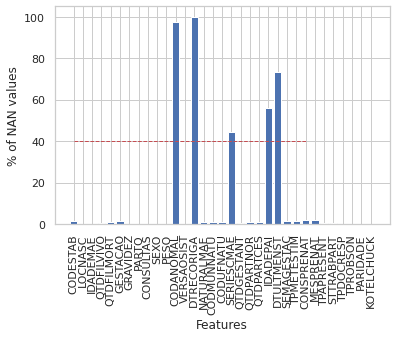

In [28]:
cat_null = sinasc19.isnull().sum()
print(cat_null)
cat_null = cat_null/len(sinasc19)*100
cat_null = cat_null[cat_null>0]
cat_null.sort_values(inplace=True, ascending=False)
print(cat_null)

null_cat=sinasc19.isna().sum()/len(sinasc19)*100
plt.bar(range(len(null_cat)),null_cat)
plt.xlabel('Features')
plt.ylabel('% of NAN values')
plt.plot([0, 25], [40, 40], 'r--', lw=1)
plt.xticks(list(range(len(sinasc19.columns))),list(sinasc19.columns.values),rotation='vertical')

In [29]:
for col in sinasc19.columns.values:
    if (pd.isna(sinasc19[col]).sum()) > 0: 
        if pd.isna(sinasc19[col]).sum() > (40/100 * len(sinasc19)): 
            print(col, 'removido') 
            sinasc19 = sinasc19.drop([col], axis=1) 
        elif (sinasc19[col].dtype == 'object'):
            sinasc19[col] = sinasc19[col].fillna(sinasc19[col].mode()[0])        
        else: sinasc19[col] = sinasc19[col].fillna(sinasc19[col].median())

CODANOMAL removido
DTRECORIGA removido
SERIESCMAE removido
IDADEPAI removido
DTULTMENST removido


### Redução de Dimensionalidade - Principal Component Analysis (PCA)

In [30]:
sinasc19 = pd.get_dummies(sinasc19)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(sinasc19.drop('PESO',axis=1),sinasc19['PESO'],test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)

(3353, 29)
(1437, 29)


In [32]:
pca_train = PCA(n_components=29).fit(x_train)
x_trar = pca_train.transform(x_train)
xtrain = pd.DataFrame(x_trar)

pca_test = PCA(n_components=29).fit(x_test)
x_tear = pca_test.transform(x_test)
xtest = pd.DataFrame(x_tear)

## Modelos

In [33]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, max_features=0.5, n_jobs=1)
random_forest.fit(xtrain, y_train)

random_forest.score(xtrain, y_train)
acc_random_forest = round(random_forest.score(xtrain, y_train) * 100, 2)
print('Acurácia do modelo Random Forest Classifier:',acc_random_forest,'\n')
y_pred = random_forest.predict(xtest)

Acurácia do modelo Random Forest Classifier: 97.94 



In [34]:
 # Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 100)
decision_tree.fit(xtrain, y_train)
y_pred2 = decision_tree.predict(xtest)
acc_decision_tree = round(decision_tree.score(xtrain, y_train) * 100, 2)
print('Acurácia do modelo Decision Tree Classifier:',acc_decision_tree,'\n')

Acurácia do modelo Decision Tree Classifier: 97.97 



In [35]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(xtrain, y_train)
y_pred3 = gaussian.predict(xtest)
acc_gaussian = round(gaussian.score(xtrain, y_train) * 100, 2)
print('Acurácia do modelo Gaussian Naive Bayes:',acc_gaussian,'\n')

Acurácia do modelo Gaussian Naive Bayes: 7.07 



In [36]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(xtrain, y_train)
y_pred5 = logreg.predict(xtest)
acc_log = round(logreg.score(xtrain, y_train) * 100, 2)
print('Acurácia do modelo Logistic Regression:',acc_log,'\n')

Acurácia do modelo Logistic Regression: 1.04 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Resultados

In [37]:
# Ranking final do percentual de acurácia dos modelos aplicados
results = pd.DataFrame({
    'Model': ['Random Forest','Decision Tree', 'Gaussian Naive Bayes','Logistic Regression'],
    'Score': [acc_random_forest, acc_decision_tree, acc_gaussian, acc_log]})
    
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
97.97,Decision Tree
97.94,Random Forest
7.07,Gaussian Naive Bayes
1.04,Logistic Regression
